# 1. Schritt: Definition von Zielen und Informationsbedürfnissen


Im Bereich der Personenfahrzeuge wird die Entwicklung des Fahrzeugbestands in der Schweiz untersucht. Ziel ist es, auf Basis öffentlich verfügbarer Daten Erkenntnisse über regionale Unterschiede sowie mögliche Zusammenhänge zwischen relevanten Einflussfaktoren zu gewinnen. Im Fokus stehen hierbei die Elektrofahrzeuge und deren infrastrukturelle sowie wirtschaftliche Rahmenbedingungen. Die folgenden Forschungsfragen werden im Detail analysiert.

## Entwicklung der Personenfahrzeuge in der Schweiz .
Wie hat sich der Bestand an Personenfahrzeugen in der Schweiz in den Jahren zwischen 2013-2023 Jahren entwickelt?

## Vergleich von den einzelnen Kantonen zum nationalen Wachstum
Wie unterscheidet sich die Entwicklung der Fahrzeugbestände in den einzelnen Kantonen im Vergleich zur gesamtschweizerischen Entwicklung?

## Vergleich der drei Haupttreibstofftypen
Wie unterscheiden sich die Entwicklungen von Fahrzeugen mit Benzin-, Diesel- und Elektroantrieb?

## Entwicklung nach Treibstoffart und Kanton
Gibt es Kantonale Unterschiede der Entwicklung nach Treibstoffarten?

## Zusammenhang zwischen dem Wachstum von Elektrofahrzeugen und öffentlichen Ladestationen
Besteht ein Zusammenhang zwischen dem Zuwachs an Elektrofahrzeugen und dem Ausbau der öffentlichen Ladeinfrastruktur in der Schweiz?

## Regionale Differenzierung der Elektromobilität in der Schweiz
Inwiefern unterscheiden sich die Schweizer Kantone im Hinblick auf Infrastruktur, Fahrzeugdurchdringung und Strompreisniveaus im Kontext der Elektromobilität?

## Zusammenhang zwischen Strompreisen und Elektrofahrzeugen
Gibt es einen  Zusammenhang zwischen den Strompreisen und der Anzahl an Elektrofahrzeugen?

# 2. Schritt: Sammlung und Aufbereitung der Daten (Collect Data)

Für die Analyse der Entwicklung und Trends im Bereich Personenfahrzeuge wurden unterschiedliche Quellen verwendet. Alle Daten konnten als CSV-Datei bezogen werden. Die Rohdaten sind im GitHub Repository abgelegt.

*   Bestand der Strassenfahrzeuge nach Gemeinde ab dem Jahr 2010 | Bundesamt für Statistik | Nutzungsbedingungen:OPEN-BY-ASK| Veröffentlicht: 30.01.2025 | Format:csv | Quelle: https://www.bfs.admin.ch/bfs/de/home/statistiken/mobilitaet-verkehr/verkehrsinfrastruktur-fahrzeuge/fahrzeuge/strassenfahrzeuge-bestand-motorisierungsgrad.assetdetail.33827764.html

*   Kennzahlen öffentliche Ladeinfrastruktur Elektromobilität | Bundesamt für Energie BFE |Nutzungsbedingungen:OPEN-USE | Veröffentlicht: 02.04.2025| Format: csv | Quelle: https://www.uvek-gis.admin.ch/BFE/ogd/57/ich_tanke_strom_Kennzahlen_monatlich.csv



*   Amtliches Ortschaftenverzeichnis | Bundesamt für Landestopografie swisstopo| Nutzungsbedingungen:OPEN-USE | Veröffentlicht: 10.10.2024| Format: csv | https://www.swisstopo.admin.ch/de/amtliches-ortschaftenverzeichnis


*   Median Strompreis für die Schweiz |Schweizer Eidgenossenschaft |Nutzungsbedingungen:OPEN-USE | Veröffentlicht: 01.01.2021| Format: csv |https://register.ld.admin.ch/opendataswiss/org/elcom











## 2.1 Laden und Importieren der Libaries
Die Verarbeitung und Darstellung der Daten erfolgt mit den untenstehenden Libarys, welche in einem ersten Schritt importiert werden.

In [1]:
#Load necessary packages/libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import matplotlib.ticker as mticker
import plotly.express as px
import numpy as np
import numpy as np
from scipy import stats
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import linregress
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install dash
!pip install mplcursors


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


## 2.2 Laden der einzelnen Datensets
Die Datensets wurden mit der Programmiersprache Python unter Verwendung der Bibliothek Pandas eingelesen. Alle Dateien lagen im CSV-Format vor, wobei je nach Quelle unterschiedliche Trennzeichen und Zeichencodierungen berücksichtigt werden mussten.

In [2]:
# Daten einlesen
df_car = pd.read_csv("/content/sample_data/Anzahl Fahrzeuge pro Typ.csv",
                 sep=';',
                 encoding='latin-1',
                 quotechar='"')


df_city = pd.read_csv("/content/sample_data/Ortschaften.csv",
                 sep=';',
                 encoding='utf-8',
                 quotechar='"')

df_strom = pd.read_csv("/content/sample_data/Median Strompreis per Kanton-full.csv", delimiter=",")

df_lade = pd.read_csv("/content/sample_data/ladestationen.csv")


Um zu überprüfen, ob die Daten korrekt improtiert wurden, wird von allen Datensets die ersten fünf Einträge abgerufen.

In [3]:
df_car.head()

,Gemeinde,Fahrzeuggruppe,Treibstoff,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1 Aeugst am Albis,Personenwagen,Benzin,863,881,891,881,856,845,822,815,816,809,804,789,778,774,724
1,1 Aeugst am Albis,Personenwagen,Diesel,175,204,229,250,276,288,306,316,318,326,329,321,311,292,287
2,1 Aeugst am Albis,Personenwagen,Benzin-elektrisch: Normal-Hybrid,3,5,7,11,13,13,18,16,20,22,30,43,49,57,74
3,1 Aeugst am Albis,Personenwagen,Benzin-elektrisch: Plug-in-Hybrid,0,0,0,0,0,0,1,2,7,7,12,20,23,26,29
4,1 Aeugst am Albis,Personenwagen,Diesel-elektrisch: Normal-Hybrid,0,0,1,1,0,0,0,2,2,3,2,5,5,7,4


In [4]:
df_city.head()

,Ortschaftsname,PLZ,Zusatzziffer,Gemeindename,BFS-Nr,Kantonskürzel,E,N,Sprache,Validity
0,Aeugst am Albis,8914,0,Aeugst am Albis,1,ZH,2679402.872,1235842.010,de,2008-07-01
1,Aeugstertal,8914,2,Aeugst am Albis,1,ZH,2679815.372,1237404.310,de,2008-07-01
2,Zwillikon,8909,0,Affoltern am Albis,2,ZH,2675280.133,1238108.286,de,2008-07-01
3,Affoltern am Albis,8910,0,Affoltern am Albis,2,ZH,2676852.012,1236929.718,de,2008-07-01
4,Bonstetten,8906,0,Bonstetten,3,ZH,2677412.150,1241078.278,de,2008-07-01


In [5]:
df_strom.head()

,Kanton,Verbrauchsprofile typischer Haushalte,Periode,Produkt,Total exkl. MWST (Rp./kWH),Netznutzung (Rp./kWH),Energielieferungkosten (Rp./kWH),Abgaben an das Gemeinwesen (Rp./kWH),Förderabgaben (KEV) (Rp./kWH)
0,St. Gallen,H4,2018,Günstigstes Produkt,18.400000,8.703333,6.138000,0.60,2.3
1,Wallis,C3,2022,Günstigstes Produkt,17.489167,6.480000,7.929167,0.78,2.3
2,Tessin,H5,2019,Günstigstes Produkt,17.292400,6.682933,6.139467,2.17,2.3
3,Schwyz,H4,2023,Günstigstes Produkt,24.661556,10.672619,11.231000,0.85,2.3
4,Zug,H4,2019,Günstigstes Produkt,17.648952,8.615619,6.733333,0.00,2.3


In [6]:
df_lade.head()

,year,month,chargingPower_10kW_count,chargingPower_21kW_count,chargingPower_42kW_count,chargingPower_100kW_count,chargingPower_100pluskW_count,chargingPower_AG_count,chargingPower_AG_sum,chargingPower_AI_count,...,stations_SH_count,stations_SO_count,stations_SZ_count,stations_TG_count,stations_TI_count,stations_UR_count,stations_VD_count,stations_VS_count,stations_ZG_count,stations_ZH_count
0,2020,11,2175,498,3210,661,563,326,11660,13,...,52,196,86,109,371,32,484,332,122,620
1,2020,12,2291,516,3353,671,564,333,11722,13,...,53,202,85,113,396,32,513,348,124,634
2,2021,1,2354,529,3483,719,584,353,13209,13,...,54,209,90,113,426,32,537,370,141,669
3,2021,2,2382,538,3558,746,609,392,16806,13,...,60,212,100,111,431,32,549,382,174,698
4,2021,3,2414,547,3632,748,614,400,17190,13,...,58,216,102,108,435,32,554,391,172,721


## 2.3 Formatieren und Bereinigen der Daten
 Da nicht alle Informationen aus den unterschiedlichen Datenquellen für die Analyse benötigt werden, werden in diesem Schritt die einzelnen Datensets bereinigt. Beispielsweise wird aus der df_car die führende Zahl, welches die BFS-Nummer ist, aus der Gemeindespalte entfernt und in eine separate Spalte geschrieben.

In [7]:
#Formatieren der Daten
##df_car
# Entferne führende Zahl aus der Gemeinde-Spalte
df_car = df_car.drop(columns=['2010', '2011', '2012'])
df_car['Gemeinde_ID'] = df_car['Gemeinde'].str.extract(r'^(\d+)\s*')
df_car['Gemeinde'] = df_car['Gemeinde'].str.replace(r'^\d+\s*', '', regex=True)

##df_City
# Spalten 'Validity' und 'Sprache' entfernen
df_city = df_city.drop(columns=['Validity', 'Sprache'])


##df_strom
##Kantonsmapping durchführen
kanton_mapping = {
    "Aargau": "AG", "Appenzell Ausserrhoden": "AR", "Appenzell Innerrhoden": "AI",
    "Basel-Landschaft": "BL", "Basel-Stadt": "BS", "Bern": "BE", "Freiburg": "FR",
    "Genf": "GE", "Glarus": "GL", "Graubünden": "GR", "Jura": "JU", "Luzern": "LU",
    "Neuenburg": "NE", "Nidwalden": "NW", "Obwalden": "OW", "Schaffhausen": "SH",
    "Schwyz": "SZ", "Solothurn": "SO", "St. Gallen": "SG", "Tessin": "TI",
    "Thurgau": "TG", "Uri": "UR", "Waadt": "VD", "Wallis": "VS", "Zug": "ZG",
    "Zürich": "ZH"
}
df_strom['Kantonskürzel'] = df_strom['Kanton'].map(kanton_mapping)


##df_lade
## Entfernen der Spalten
df_lade = df_lade.drop(columns=[
    'chargingPower_10kW_count',
    'chargingPower_21kW_count',
    'chargingPower_42kW_count',
    'chargingPower_100kW_count',
    'chargingPower_100pluskW_count'
], errors='ignore')

## 2.4 Mergen der beiden Datensätze df_car und df_city
Um den Fahrzeugbestand auf Gemeindeebene mit zusätzlichen geografischen Informationen anzureichern, wurde ein Datenabgleich zwischen zwei Datensätzen durchgeführt. Konkret wurden die Fahrzeugdaten `df_car` mit einem Gemeindedatensatz `df_city` zusammengeführt. Die Verbindung erfolgte über den BFS-Nr.: Die Spalte Gemeinde_ID aus dem Fahrzeugdatensatz wurde mit der Spalte BFS-Nr. aus dem Gemeindedatensatz abgeglichen. Dabei wurde ein Left Join verwendet, um sicherzustellen, dass alle Gemeinden aus dem Fahrzeugdatensatz erhalten bleiben.

Nach dem Zusammenführen enthielt der neue Datensatz `df_car_city` neben den ursprünglichen Informationen auch das zugehörige Kantonskürzel. Der erweiterte Datensatz wird gespeichert als CSV-Datei unter dem Namen `output_mit_plz.csv`.

In [8]:
df_car.head()

,Gemeinde,Fahrzeuggruppe,Treibstoff,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Gemeinde_ID
0,Aeugst am Albis,Personenwagen,Benzin,881,856,845,822,815,816,809,804,789,778,774,724,1
1,Aeugst am Albis,Personenwagen,Diesel,250,276,288,306,316,318,326,329,321,311,292,287,1
2,Aeugst am Albis,Personenwagen,Benzin-elektrisch: Normal-Hybrid,11,13,13,18,16,20,22,30,43,49,57,74,1
3,Aeugst am Albis,Personenwagen,Benzin-elektrisch: Plug-in-Hybrid,0,0,0,1,2,7,7,12,20,23,26,29,1
4,Aeugst am Albis,Personenwagen,Diesel-elektrisch: Normal-Hybrid,1,0,0,0,2,2,3,2,5,5,7,4,1


In [9]:
# Mergen der beiden DataFrames basierend auf der Spalte "Ort"
df_bfs = df_city[['BFS-Nr', 'Kantonskürzel']].copy()
df_car['Gemeinde_ID'] = df_car['Gemeinde_ID'].astype(int)
df_bfs['BFS-Nr'] = df_bfs['BFS-Nr'].astype(int)
df_bfs = df_bfs.drop_duplicates(subset='BFS-Nr', keep='first')
df_bfs = df_bfs[df_bfs['BFS-Nr'] < 7000] #BFS Nummern grösser als 7000 löschen (Lichtenstein)
print(df_bfs)

df_car_city = pd.merge(df_car, df_bfs, left_on='Gemeinde_ID', right_on='BFS-Nr', how='left')
# Speichern der neuen CSV-Datei mit der hinzugefügten PLZ
df_car_city.to_csv('output_mit_plz.csv', index=False, encoding='utf-8', sep=';', quotechar='"')

      BFS-Nr Kantonskürzel
0          1            ZH
2          2            ZH
4          3            ZH
5          4            ZH
9          5            ZH
...      ...           ...
5724    6808            JU
5731    6809            JU
5736    6810            JU
5742    6811            JU
5744    6812            JU

[2122 rows x 2 columns]


# 3. Schritt: Analyse der Daten (Analyze Data)
Nachfolgend werden die erfassten Daten in Hinblick auf die Forschungsfragen analysiert und beschrieben. Die Daten basieren auf den aufbereiteten Daten aus den vorhergehenden Kapiteln.

## 3.1 Entwicklung der Personenfahrzeuge in der Schweiz

Analyse der Entwicklung der Personenfahrzeuge in der Schweiz

In [10]:
# Jahres-Spalten definieren von 2013 bis 2023
jahr_spalten = [str(year) for year in range(2013, 2024)]

# Daten vorbereiten
df_car_city[jahr_spalten] = df_car_city[jahr_spalten].apply(pd.to_numeric, errors='coerce')
df_car_city_summe = df_car_city[jahr_spalten].sum(axis=0)
df_car_city_summe.index = df_car_city_summe.index.astype(int)

# Wachstum zwischen 2013 und 2023 berechnen
wachstum_gesamt = df_car_city_summe[2023] - df_car_city_summe[2013]
wachstum_prozent = (df_car_city_summe[2023] / df_car_city_summe[2013] - 1) * 100

# Jährliche durchschnittliche Wachstumsrate (CAGR) berechnen
jahre = 2023 - 2013
cagr = (pow(df_car_city_summe[2023] / df_car_city_summe[2013], 1/jahre) - 1) * 100

# Gesamtsumme der Fahrzeuge für die ganze Schweiz pro Jahr berechnen
df_schweiz = df_car_city[jahr_spalten].sum()
df_schweiz = pd.DataFrame({'Jahr': df_schweiz.index.astype(int), 'Anzahl': df_schweiz.values})

# IBCS Farbschema
IBCS_BLACK = '#000000'
IBCS_GRAY = '#888888'

# Plot erstellen
fig = go.Figure()

# Minimalwert für Y-Achse
min_y = min(df_schweiz['Anzahl'])
max_y = max(df_schweiz['Anzahl'])

# Werte formatieren
def format_in_millions(value):
    """Formatiert Werte in Millionen mit einer Dezimalstelle"""
    return f"{round(value/1000000, 1)}M"

# Vollständige Werte für Hover-Info formatieren
hover_values = [f"{int(val):,}".replace(",", "'") for val in df_schweiz['Anzahl']]

# Kompakte Werte für die Anzeige
text_values = [format_in_millions(val) for val in df_schweiz['Anzahl']]

# Trace erstellen
fig.add_trace(go.Scatter(
    x=df_schweiz['Jahr'],
    y=df_schweiz['Anzahl'],
    mode='lines+markers+text',
    name='Schweiz Gesamt',
    line=dict(color=IBCS_BLACK, width=1.5),
    marker=dict(size=6, color=IBCS_BLACK),
    text=text_values,
    textposition='top center',
    textfont=dict(size=9, color=IBCS_BLACK),
    hovertemplate='<b>%{x}</b><br>Anzahl Fahrzeuge: %{customdata}<extra></extra>',
    customdata=hover_values
))

# Annotation für den Minimalwert
min_annotation = dict(
    x=df_schweiz['Jahr'].min() - 0.5,
    y=min_y,
    xref='x',
    yref='y',
    text=format_in_millions(min_y),
    showarrow=False,
    font=dict(color=IBCS_GRAY, size=9),
    align='right',
    xanchor='right'
)

# Quellen-Annotation
source_annotation = dict(
    x=0.01,
    y=-0.15,
    xref='paper',
    yref='paper',
    showarrow=False,
    font=dict(size=8, color=IBCS_GRAY),
    align='left',
    xanchor='left'
)

# Information zu den Millionen-Werten
million_note = dict(
    x=0.99,
    y=-0.15,
    xref='paper',
    yref='paper',
    text='Angaben in Millionen (M)',
    showarrow=False,
    font=dict(size=8, color=IBCS_GRAY),
    align='right',
    xanchor='right'
)

# Layout an IBCS Standard angepasst
fig.update_layout(
    # Titel und Message
    title={
        'text': f"<b>Fahrzeugbestand in der Schweiz</b><br>"
                f"<span style='font-size:10px;color:#888888'>"
                f"Entwicklung 2013–2023 – Absolute Zunahme: {wachstum_gesamt:,}".replace(",", "'") + " "
                f"({wachstum_prozent:.1f}%) | Durchschnittliches Wachstum (CAGR): {cagr:.1f}%"
                f"</span>",
        'x': 0.01,
        'xanchor': 'left',
        'font': {'size': 14, 'color': IBCS_BLACK}
    },
    # Achsenformatierung gemäss IBCS (Kein Showgrid, Showline und Farbe Grau)
    xaxis={
        'showgrid': False,
        'showline': True,
        'linecolor': IBCS_GRAY,
        'linewidth': 0.5,
        'ticks': 'outside',
        'tickfont': {'size': 9, 'color': IBCS_BLACK},
        'title': {'text': 'Jahr', 'font': {'size': 10, 'color': IBCS_BLACK}},
        'tickmode': 'array',
        'tickvals': df_schweiz['Jahr'],
        'range': [df_schweiz['Jahr'].min() - 0.5, df_schweiz['Jahr'].max() + 0.5]
    },
    yaxis={
        'showgrid': False,
        'showline': False,
        'showticklabels': False,
        'range': [min_y * 0.95, max_y * 1.05],
        'zeroline': False
    },
    #Zusätzliche Formatierung des Hintergrunds sowie Höhe & Breite und das Ausblenden der Legende
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin={'t': 100, 'b': 50, 'l': 50, 'r': 30},
    height=400,
    width=800,
    showlegend=False,
    annotations=[min_annotation, source_annotation, million_note]
)

# Wachstum berechnen
wachstum_absolut = df_schweiz['Anzahl'].iloc[-1] - df_schweiz['Anzahl'].iloc[0]
wachstum_prozent = (df_schweiz['Anzahl'].iloc[-1] / df_schweiz['Anzahl'].iloc[0] - 1) * 100
jahre_anzahl = len(df_schweiz) - 1
cagr = (pow(df_schweiz['Anzahl'].iloc[-1] / df_schweiz['Anzahl'].iloc[0], 1/jahre_anzahl) - 1) * 100

# Wachstumsinfo als Annotation hinzufügen
growth_annotation = dict(
    x=0.99,
    y=0.01,
    xref='paper',
    yref='paper',
    text=f"Gesamtwachstum: +{wachstum_prozent:.1f}%<br>CAGR: +{cagr:.1f}%",
    showarrow=False,
    font=dict(size=9, color=IBCS_BLACK),
    align='right',
    xanchor='right'
)
fig.add_annotation(growth_annotation)

# Anzeigen des Diagramms
fig.show()

## 3.2 Vergleich von den einzelnen Kantonen zum nationalen Wachstum

In der untenstehenden Grafik wird die Entwicklung des Fahrzeugbestands in den verschiedenen Kantonen aufgezeigt im Vergleich zur prozentualen Wachstumsrate der Schweiz.

In [11]:
# Jahres-Spalten definieren von 2013 bis 2024
jahre = [str(year) for year in range(2013, 2025)]

# Gruppieren nach Kanton und Summieren der Fahrzeuge pro Jahr
df_kanton_jahr = df_car_city.groupby('Kantonskürzel')[jahre].sum()
df_kanton_jahr = df_kanton_jahr.transpose()
df_kanton_jahr.index = df_kanton_jahr.index.astype(int)
df_kanton_jahr.index.name = 'Jahr'
df_kanton_jahr.reset_index(inplace=True)

# %-Veränderung berechnen (Jahr-zu-Jahr)
df_prozent = pd.DataFrame({'Jahr': df_kanton_jahr['Jahr']})
for kanton in df_kanton_jahr.columns[1:]:
    df_prozent[kanton] = df_kanton_jahr[kanton].pct_change() * 100

# Schweizweite Veränderung berechnen
df_kanton_jahr['CH'] = df_kanton_jahr.iloc[:, 1:].sum(axis=1)
df_prozent['CH'] = df_kanton_jahr['CH'].pct_change() * 100

# NaN-Werte für das erste Jahr entfernen
df_prozent = df_prozent.dropna()

# IBCS Farbschema
IBCS_BLACK = '#000000'
IBCS_GRAY = '#888888'
IBCS_LIGHT_GRAY = '#dddddd'
IBCS_GREEN = '#00cc00'
IBCS_RED = '#cc0000'

# Funktion für Prozentformatierung
def format_percent(value):
    return f"{value:.1f}%"

# Plot erstellen
fig = make_subplots(rows=1, cols=1, subplot_titles=[""])

# Nationales Wachstum, ist immer sichtbar und beschriftet
text_values_ch = [format_percent(val) for val in df_prozent['CH']]
colors_ch = [IBCS_GREEN if val >= 0 else IBCS_RED for val in df_prozent['CH']]

trace_ch = go.Scatter(
    x=df_prozent['Jahr'],
    y=df_prozent['CH'],
    name='Nationale Entwicklung (CH)',
    mode='lines+markers+text',
    line=dict(color=IBCS_BLACK, width=2),
    marker=dict(size=6),
    text=text_values_ch,
    textposition='bottom center',
    textfont=dict(size=9, color=IBCS_BLACK),
    hoverinfo='x+y+name',
    visible=True
)
fig.add_trace(trace_ch)

# Beschriftung "CH" mit Prozentwert am Ende der Linie hinzufügen
ch_last_value = df_prozent['CH'].iloc[-1]
ch_label = f"CH ({format_percent(ch_last_value)})"

# Bestimmen des ersten sichtbaren Kantons
first_kanton = df_prozent.columns[1]

# Wachstumslinie für jeden Kanton hinzufügen
traces = []
for kanton in df_prozent.columns[1:]:
    if kanton == 'CH':
        continue

    text_values = [format_percent(val) for val in df_prozent[kanton]]
    colors = [IBCS_GREEN if val >= 0 else IBCS_RED for val in df_prozent[kanton]]

    trace = go.Bar(
        x=df_prozent['Jahr'],
        y=df_prozent[kanton],
        name=f'Kanton {kanton}',
        marker=dict(color=colors),
        text=text_values,
        textposition='outside',
        textfont=dict(size=9, color=IBCS_BLACK),
        visible=(kanton == first_kanton),
        hoverinfo='x+y+name'
    )
    fig.add_trace(trace)
    traces.append(trace)

# Min/Max Y-Achse
y_min = min(0, df_prozent.iloc[:, 1:].min().min() * 1.5)
y_max = max(0, df_prozent.iloc[:, 1:].max().max() * 1.5)

# Annotationen
zero_line = dict(
    type='line',
    xref='paper',
    yref='y',
    x0=0,
    y0=0,
    x1=1,
    y1=0,
    line=dict(color=IBCS_BLACK, width=1)
)

source_annotation = dict(
    x=0.01,
    y=-0.15,
    xref='paper',
    yref='paper',
    showarrow=False,
    font=dict(size=8, color=IBCS_GRAY),
    align='left',
    xanchor='left'
)

# Y-Achsenbeschriftung hinzufügen
y_axis_title = dict(
    x=-0.05,
    y=0.5,
    xref='paper',
    yref='paper',
    text='Veränderung in %',
    showarrow=False,
    font=dict(size=10, color=IBCS_BLACK),
    textangle=-90
)

# Kantonsnamen kürzen
def shorten_kanton(kanton_name):
    return kanton_name[:3]

# Beschriftung "CH" am Ende der Linie
fig.add_trace(go.Scatter(
    x=[df_prozent['Jahr'].iloc[-1] + 0.2],
    y=[df_prozent['CH'].iloc[-1]],
    mode='text',
    text=['%-Entwicklung CH'],
    textposition='top right',
    showlegend=False,
    textfont=dict(size=11, color=IBCS_BLACK)
))

# Dropdown-Menü
buttons = []
for i, kanton in enumerate(df_prozent.columns[1:]):
    if kanton == 'CH':
        continue

    kanton_index = list(df_prozent.columns[1:]).index(kanton)
    visible = [True]
    visible += [i == kanton_index for i in range(len(df_prozent.columns) - 2)]

    kurz_kanton = shorten_kanton(kanton)

    buttons.append(dict(
        label=kurz_kanton,
        method='update',
        args=[
            {'visible': visible},
            {
                'title': {
                    'text': f'<b style="color:black">Jährliche Veränderung des Fahrzeugbestands in {kanton}</b><br>'
                            f'<span style="font-size:10px;color:#888888">Basis 2013, Prozentuale Veränderung des Fahrzeugbestands in den einzelnen Kantonen inkl. nationale Entwicklung (CH), 2013–2023</span>',
                    'x': 0.01,
                    'xanchor': 'left'
                },
                'annotations': [source_annotation, y_axis_title],
                'legend': {
                    'title': {'text': 'Legende:'},
                    'y': 1.1,
                    'x': 0.5,
                    'xanchor': 'center',
                    'orientation': 'h'
                }
            }
        ]
    ))

# Layout an IBCS Standard angepasst
fig.update_layout(
    # Titel und Message
    title={
        'text': f'<b style="color:black">Jährliche Veränderung des Fahrzeugbestands in {first_kanton}</b><br>'
                f'<span style="font-size:10px;color:#888888">Basis 2013, Prozentuale Veränderung des Fahrzeugbestands in den einzelnen Kantonen inkl. nationale Entwicklung (CH), 2013–2023</span>',
        'x': 0.01,
        'xanchor': 'left',
        'font': {'size': 14, 'color': IBCS_BLACK}
    },
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.99,
        'y': 1.12,
        'xanchor': 'right',
        'yanchor': 'top',
        'bgcolor': 'white',
        'bordercolor': IBCS_GRAY,
        'font': {'color': IBCS_BLACK}
    }],
    # Achsenformatierung gemäss IBCS (Kein Showgrid, Showline und Farbe Grau)
    xaxis={
        'showgrid': False,
        'showline': True,
        'linecolor': IBCS_GRAY,
        'linewidth': 1,
        'ticks': 'outside',
        'tickfont': {'size': 9, 'color': IBCS_BLACK},
        'title': {'text': 'Jahr', 'font': {'size': 10, 'color': IBCS_BLACK}},
        'tickmode': 'array',
        'tickvals': df_prozent['Jahr'],
        'range': [df_prozent['Jahr'].min() - 1, df_prozent['Jahr'].max() + 3]
    },
    yaxis={
        'showgrid': False,
        'gridcolor': IBCS_LIGHT_GRAY,
        'gridwidth': 0.5,
        'showline': False,  # Y-Achsenlinie anzeigen
        'linecolor': IBCS_GRAY,
        'linewidth': 1,
        'ticksuffix': '%',
        'tickfont': {'size': 9, 'color': IBCS_BLACK},
        'showticklabels': False,  # Y-Achsenbeschriftungen anzeigen
        'zeroline': False,  # Entfernt die Null-Linie, da wir diese bereits als Shape hinzufügen
        'range': [-3, 17]
    },
    #Zusätzliche Formatierung des Hintergrunds sowie Höhe & Breite und das Ausblenden der Legende
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin={'t': 100, 'b': 50, 'l': 60, 'r': 30},
    height=500,
    width=800,
    showlegend=False,  # Legende anzeigen
    annotations=[source_annotation, y_axis_title],
    shapes=[zero_line]
)
# Anzeigen des Diagramms
fig.show()

Ermittlung von maximalen Zuwach mit Basis 2013

In [12]:
#Kantone definieren
kantone = [k for k in df_prozent.columns if k not in ['Jahr', 'CH']]

# Maximaler Zuwachs je Kanton + zugehöriges Jahr
maxima = df_prozent[kantone].max()
kanton_meiste_zuwachs = maxima.idxmax()
wert_meiste_zuwachs = maxima.max()
jahr_meiste_zuwachs = df_prozent.loc[df_prozent[kanton_meiste_zuwachs].idxmax(), 'Jahr']

# Minimaler Zuwachs je Kanton + zugehöriges Jahr
minima = df_prozent[kantone].min()
kanton_wenigste_zuwachs = minima.idxmin()
wert_wenigste_zuwachs = minima.min()
jahr_wenigste_zuwachs = df_prozent.loc[df_prozent[kanton_wenigste_zuwachs].idxmin(), 'Jahr']

# Ausgabe
print(f"Höchster Zuwachs: {kanton_meiste_zuwachs} mit {wert_meiste_zuwachs:.1f} % im Jahr {jahr_meiste_zuwachs}")
print(f"Stärkster Rückgang: {kanton_wenigste_zuwachs} mit {wert_wenigste_zuwachs:.1f} % im Jahr {jahr_wenigste_zuwachs}")


Höchster Zuwachs: ZG mit 5.1 % im Jahr 2018
Stärkster Rückgang: BS mit -1.9 % im Jahr 2015


## 3.3 Vergleich der drei Haupttreibstofftypen
In diesem Diagramm wird der Fahrzeugbestand nach Treibstoffarten dargestellt. Dabei wurden neben den klassischen Treibstoffen wie Benzin und Diesel auch Fahrzeuge mit Elektromotor berücksichtigt, da diese zunehmend verbreitet sind. Andere Antriebsarten, wie zum Beispiel Wasserstoff und Gas, zeigen seit Jahren vergleichbare Werte und wurden daher in dieser Analyse nicht berücksichtigt.

In [13]:
# Funktion zur Kategorisierung der Treibstoffe
def kategorisieren(treibstoff):
    elektro_hybrid = [
        'Benzin-elektrisch: Normal-Hybrid',
        'Benzin-elektrisch: Plug-in-Hybrid',
        'Diesel-elektrisch: Normal-Hybrid',
        'Diesel-elektrisch: Plug-in-Hybrid',
        'Elektrisch'
    ]
    benzin = ['Benzin']
    diesel = ['Diesel']

    if treibstoff in elektro_hybrid:
        return 'Elektro/Hybrid'
    elif treibstoff in benzin:
        return 'Benzin'
    elif treibstoff in diesel:
        return 'Diesel'
    else:
        return None

# Neue Spalte mit kategorisierten Antriebsarten
df_car_city['Antriebsart'] = df_car_city['Treibstoff'].apply(kategorisieren)

# Polynomial Forecast-Funktion (Grad 2)
def forecast_by_treibstoff_poly(df, treibstoff, degree=2):
    df_filtered = df[df['Antriebsart'] == treibstoff]
    Jahr_spalten = [str(year) for year in range(2013, 2025)]
    jahres_summe = df_filtered[Jahr_spalten].sum().fillna(0)

    if jahres_summe.sum() == 0:
        return None, None

    X = np.arange(len(jahres_summe)).reshape(-1, 1)
    y = jahres_summe.values

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_forecast = np.arange(len(jahres_summe), len(jahres_summe) + 3).reshape(-1, 1)
    X_forecast_poly = poly.transform(X_forecast)
    y_forecast = model.predict(X_forecast_poly)

    Jahre = list(jahres_summe.index) + [str(year) for year in range(2025, 2028)]
    Werte = list(jahres_summe.values) + list(y_forecast)

    return Jahre, Werte

# IBCS-konformes Plot erstellen
def create_ibcs_plot(df):
    antriebsarten = ['Elektro/Hybrid', 'Benzin', 'Diesel']
    fig = go.Figure()

    historical_color = 'black'
    forecast_color = 'lightgray'

    for antriebsart in antriebsarten:
        forecast_result = forecast_by_treibstoff_poly(df, antriebsart, degree=2)

        if forecast_result[0] is not None:
            Jahre, Werte = forecast_result

            # Historische Daten
            fig.add_trace(go.Scatter(
                x=Jahre[:len(Jahre)-3],
                y=Werte[:len(Werte)-3],
                mode='lines+markers+text',
                name=f'{antriebsart} historisch',
                line=dict(color=historical_color),
                marker=dict(symbol='circle', size=6),
                text=[f'{round(val/1e6, 1)} M' for val in Werte[:len(Werte)-3]],
                textposition='top center',
                showlegend=False
            ))

            # Prognose-Daten
            fig.add_trace(go.Scatter(
                x=Jahre[len(Jahre)-3:],
                y=Werte[-3:],
                mode='lines+markers+text',
                name=f'{antriebsart} prognose',
                line=dict(color=forecast_color, dash='dot'),
                marker=dict(symbol='circle-open', size=8),
                text=[f'{round(val/1e6, 1)} M' for val in Werte[-3:]],
                textposition='top center',
                showlegend=False
            ))

            # Label am Ende
            fig.add_trace(go.Scatter(
                x=[int(Jahre[-1]) - 0.2],
                y=[Werte[-1]],
                mode='text',
                text=[antriebsart],
                textposition='middle center',
                showlegend=False,
                textfont=dict(size=11, color='black')
            ))

    # Layout
    fig.update_layout(
        title={
            'text': ('<b style="color:black">Fahrzeugbestand nach Antriebsart</b><br>'
                     '<span style="font-size:14px;color:black">'
                     'Fahrzeugbestand bis im Jahr 2024 sowie eine Prognose bis 2027 basierend auf polynomialer Regression (Grad 2)</span>'),
            'x': 0,
            'xanchor': 'left'
        },
        xaxis_title='Jahr',
        height=600,
        plot_bgcolor='white',
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            tickvals=[str(year) for year in range(2013, 2031)],
            ticktext=[str(year) for year in range(2013, 2028)] + ['']*4,
            showticklabels=True
        ),
        yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, showticklabels=False),
        showlegend=False
    )

    return fig

# Anzeige
fig = create_ibcs_plot(df_car_city)
fig.show()

Berechnung der prozenualen Veränderungen in der Schweiz in Bezug auf die Antriebsarten.

In [14]:
# Funktion zur Berechnung der prozentualen Veränderung
def calculate_percentage_change(df, treibstoff):
    # Daten für den spezifischen Treibstoff herausfiltern
    df_filtered = df[df['Antriebsart'] == treibstoff]
    jahres_summe = df_filtered[[str(year) for year in range(2013, 2025)]].sum().fillna(0)

    if jahres_summe.sum() == 0:
        return None

    # Prozentsatzänderung berechnen (letzter Wert - erster Wert) / erster Wert * 100
    first_value = jahres_summe.iloc[0]
    last_value = jahres_summe.iloc[-1]
    percentage_change = ((last_value - first_value) / first_value) * 100

    return percentage_change

# Berechnung der prozentualen Veränderung für Diesel, Benzin und Elektro
benziner_change = calculate_percentage_change(df_car_city, 'Benzin')
diesel_change = calculate_percentage_change(df_car_city, 'Diesel')
elektro_change = calculate_percentage_change(df_car_city, 'Elektro/Hybrid')

# Ergebnisse anzeigen
print(f'Prozentuale Veränderung Benzin: {benziner_change:.2f}%')
print(f'Prozentuale Veränderung Diesel: {diesel_change:.2f}%')
print(f'Prozentuale Veränderung Elektro/Hybrid: {elektro_change:.2f}%')


Prozentuale Veränderung Benzin: -10.37%
Prozentuale Veränderung Diesel: 17.76%
Prozentuale Veränderung Elektro/Hybrid: 1667.07%


## 3.4 Entwicklung nach Treibstoffart und Kanton

Um ein genaueres Bild von der Entwicklung nach in Bereich der einzelnen Treibstoffarten zu erhalten, wird die untenstehende Grafik dargestellt. Hierbei sind die Entwicklungen nach den einzelnen Kantonen ersichtlich.

In [15]:
# Funktion zur Kategorisierung der Treibstoffe
def kategorisieren(treibstoff):
    elektro_hybrid = [
        'Benzin-elektrisch: Normal-Hybrid',
        'Benzin-elektrisch: Plug-in-Hybrid',
        'Diesel-elektrisch: Normal-Hybrid',
        'Diesel-elektrisch: Plug-in-Hybrid',
        'Elektrisch'
    ]
    benzin = ['Benzin']
    diesel = ['Diesel']

    if treibstoff in elektro_hybrid:
        return 'Elektro + Hybrid'
    elif treibstoff in benzin:
        return 'Benzin'
    elif treibstoff in diesel:
        return 'Diesel'
    else:
        return None


# Kategorisierung der Treibstoffe
df_car_city['Treibstoff_Kategorie'] = df_car_city['Treibstoff'].apply(kategorisieren)
df_filtered = df_car_city.dropna(subset=['Treibstoff_Kategorie'])
jahre = [str(year) for year in range(2013, 2025)]

# Gruppieren und Umformen
df_kanton_treibstoff_jahr = df_filtered.groupby(['Kantonskürzel', 'Treibstoff_Kategorie'])[jahre].sum().reset_index()
df_long = pd.melt(
    df_kanton_treibstoff_jahr,
    id_vars=['Kantonskürzel', 'Treibstoff_Kategorie'],
    value_vars=jahre,
    var_name='Jahr',
    value_name='Anzahl'
)
df_long['Jahr'] = df_long['Jahr'].astype(int)
df_long = df_long.sort_values(['Kantonskürzel', 'Treibstoff_Kategorie', 'Jahr'])
df_long['pct_change'] = df_long.groupby(['Kantonskürzel', 'Treibstoff_Kategorie'])['Anzahl'].pct_change() * 100
df_prozent = df_long.dropna().copy()
df_prozent['identifier'] = df_prozent['Kantonskürzel'] + '_' + df_prozent['Treibstoff_Kategorie']

# Farben und Formatierungen
IBCS_BLACK = '#000000'
IBCS_GRAY = '#888888'
IBCS_LIGHT_GRAY = '#dddddd'

def format_percent(value):
    return f"{value:.1f}%"

# Plot erstellen
fig = make_subplots(rows=1, cols=1, subplot_titles=[""])
unique_identifiers = df_prozent['identifier'].unique()
first_id = unique_identifiers[0] if len(unique_identifiers) > 0 else None

# Linien zeichnen
for idx, identifier in enumerate(unique_identifiers):
    subset = df_prozent[df_prozent['identifier'] == identifier]
    kanton, treibstoff = identifier.split('_')

    text_values = [format_percent(val) for val in subset['pct_change']]
    line_color = IBCS_BLACK
    marker_colors = [IBCS_BLACK for _ in subset['pct_change']]

    trace = go.Scatter(
        x=subset['Jahr'],
        y=subset['pct_change'],
        mode='lines+markers+text',
        name=f'{treibstoff} ({kanton})',
        line=dict(color=line_color, width=2),
        marker=dict(color=marker_colors, size=8),
        text=text_values,
        textposition='top center',
        textfont=dict(size=9, color=IBCS_BLACK),
        customdata=np.stack((subset['Treibstoff_Kategorie'], subset['Kantonskürzel']), axis=-1),
        hovertemplate='%{x}: %{y:.1f}%<br>Kanton: %{customdata[1]}<br>Treibstoff: %{customdata[0]}<extra></extra>',
        visible=(identifier.startswith(first_id.split('_')[0] + '_'))
    )

    fig.add_trace(trace)

    # Beschriftung am letzten Punkt
    last_row = subset.iloc[-1]
    label_trace = go.Scatter(
        x=[last_row['Jahr']+0.5],
        y=[last_row['pct_change']],
        mode='text',
        text=[treibstoff],
        textposition='bottom right',
        textfont=dict(size=10, color=IBCS_BLACK),
        showlegend=False,
        hoverinfo='skip',
        visible=(identifier.startswith(first_id.split('_')[0] + '_'))
    )
    fig.add_trace(label_trace)

# Dropdown-Menü
buttons = []
kantone = sorted(set([identifier.split('_')[0] for identifier in unique_identifiers]))

for kanton in kantone:
    kanton_identifiers = [id for id in unique_identifiers if id.startswith(kanton + '_')]
    visibility = []
    for identifier in unique_identifiers:
        visibility.append(identifier in kanton_identifiers)
        visibility.append(identifier in kanton_identifiers)
    buttons.append(dict(
        label=kanton,
        method='update',
        args=[{'visible': visibility},
              {'title': {
                  'text': f'<b style="color:black" >Jährliche Veränderung des Fahrzeugbestands nach Treibstoff in {kanton}</b><br>'
                          f'<span style="font-size:10px;color:#888888">Prozentuale Veränderung des Fahrzeugbestands nach Kanton und Treibstoffart, 2013–2024</span>',
                  'x': 0.01,
                  'xanchor': 'left'
              }}]
    ))

# Achsenbereich definieren
if not df_prozent.empty:
    y_min = max(-30, df_prozent['pct_change'].min() * 1.2)
    y_max = min(30, df_prozent['pct_change'].max() * 1.2)
else:
    y_min, y_max = -10, 10

# Nulllinie
shapes = [dict(
    type='line',
    xref='paper',
    yref='y',
    x0=0,
    y0=0,
    x1=1,
    y1=0,
    line=dict(color=IBCS_BLACK, width=1)
)]

# Layout an IBCS Standard angepasst
first_kanton = kantone[0] if kantone else "Alle"
fig.update_layout(
    # Titel und Message
    title={
        'text': f'<b style="color:black">Jährliche Veränderung des Fahrzeugbestands nach Treibstoff in {first_kanton}</b><br>'
                f'<span style="font-size:10px;color:#888888">Prozentuale Veränderung des Fahrzeugbestands nach Kanton und Treibstoffart, 2013–2024</span>',
        'x': 0.01,
        'xanchor': 'left',
        'font': {'size': 14, 'color': IBCS_BLACK}
    },
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.99,
        'y': 1.12,
        'xanchor': 'right',
        'yanchor': 'top',
        'bgcolor': 'white',
        'bordercolor': IBCS_GRAY,
        'font': {'color': IBCS_BLACK}
    }],
    # Achsenformatierung gemäss IBCS (Kein Showgrid, Showline und Farbe Grau)
    xaxis={
        'showgrid': False,
        'showline': True,
        'linecolor': IBCS_GRAY,
        'linewidth': 1,
        'ticks': 'outside',
        'tickfont': {'size': 9, 'color': IBCS_BLACK},
        'title': {'text': 'Jahr', 'font': {'size': 10, 'color': IBCS_BLACK}},
        'tickmode': 'array',
        'tickvals': list(range(2014, 2025)),
        'range': [2013.5, 2027.5]
    },
    yaxis={
        'showgrid': False,
        'gridcolor': IBCS_LIGHT_GRAY,
        'gridwidth': 0.5,
        'showline': False,
        'linecolor': IBCS_GRAY,
        'linewidth': 1,
        'ticksuffix': '%',
        'tickfont': {'size': 9, 'color': IBCS_BLACK},
        'showticklabels': False,
        'zeroline': False,
        'range': [-10, 90]
    },
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin={'t': 100, 'b': 60, 'l': 80, 'r': 80},
    shapes=shapes,
    showlegend=False,
    annotations=[
        dict(
            x=0.01,
            y=-0.15,
            xref='paper',
            yref='paper',
            showarrow=False,
            font=dict(size=8, color=IBCS_GRAY),
            align='left',
            xanchor='left'
        ),
        dict(
            x=-0.08,
            y=0.5,
            xref='paper',
            yref='paper',
            text='Veränderung in %',
            showarrow=False,
            font=dict(size=10, color=IBCS_BLACK),
            textangle=-90
        )
    ],
    height=550,
    width=900
)
# Anzeigen des Diagramms
fig.show()


In der untenstehenden Analyse sind die Kantone mit den prozentualen stärksten Veränderungen je nach Antriebstyp ersichtlich.


In [16]:
# Berechne die grösste prozentuale Veränderung pro Kanton und Treibstoff
max_pct_change = df_prozent.groupby(['Kantonskürzel', 'Treibstoff_Kategorie'])['pct_change'].max().reset_index()
min_pct_change = df_prozent.groupby(['Kantonskürzel', 'Treibstoff_Kategorie'])['pct_change'].min().reset_index()

# Finde die Top-Kantone mit den grössten positiven Änderungen
top_positive_changes = max_pct_change.sort_values(by='pct_change', ascending=False).head(5).reset_index(drop=True)

# Finde die Top-Kantone mit den grössten negativen Änderungen
top_negative_changes = min_pct_change.sort_values(by='pct_change', ascending=True).head(5).reset_index(drop=True)

# Ausgabe der Top 5 grössten positiven und negativen Veränderungen
top_positive_changes, top_negative_changes


(  Kantonskürzel Treibstoff_Kategorie  pct_change
 0            ZG     Elektro + Hybrid   78.920647
 1            UR     Elektro + Hybrid   73.059361
 2            VS     Elektro + Hybrid   66.555961
 3            GR     Elektro + Hybrid   66.133584
 4            NE     Elektro + Hybrid   65.201052,
   Kantonskürzel Treibstoff_Kategorie  pct_change
 0            TI               Diesel   -7.246224
 1            ZG               Diesel   -7.207207
 2            VD               Diesel   -7.007399
 3            GE               Diesel   -5.944007
 4            ZH               Diesel   -5.327675)

## 3.5 Zusammenhang zwischen dem Wachstum von Elektrofahrzeugen (Elektro + Plug-in-Hybrid-Fahrzeuge) und öffentlichen Ladestationen


Ermittlung ob es einen Zusammenhang zwischen der Zunahme an Elektrofahrzeugen und den öffentlichen Ladestationen gibt.

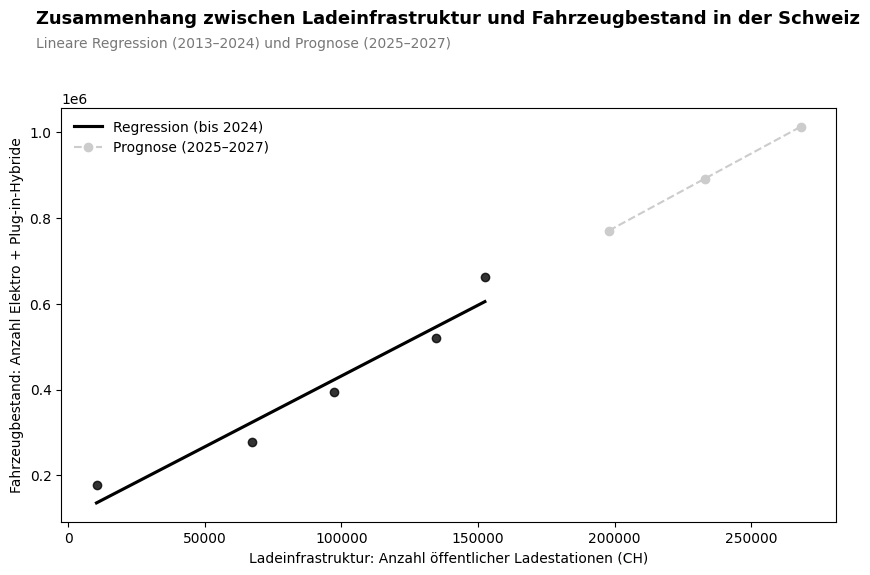

In [17]:
# Ladestationsdaten vorbereiten
df_lade.rename(columns={'year': 'Jahr'}, inplace=True)

# Ladestationen-Spalte erzeugen
df_lade['Ladestationen_CH'] = df_lade['stations_CH_count']
df_lade = df_lade.groupby('Jahr').sum().reset_index()
#df_lade = df_lade.drop(columns=['month'])
# Fahrzeug-Daten vorbereiten
jahre = [str(j) for j in range(2013, 2025)]
df_elektro = df_car_city[df_car_city['Antriebsart'].isin(['Elektro', 'Elektro/Hybrid'])]

elektro_phev_jahr = df_elektro[jahre].sum().reset_index()
elektro_phev_jahr.columns = ['Jahr', 'Elektro_PHEV_CH']
elektro_phev_jahr['Jahr'] = elektro_phev_jahr['Jahr'].astype(int)


# Mergen der beiden Inhalte
df_merge_phev = pd.merge(df_lade, elektro_phev_jahr, on='Jahr')

# Nur historische Daten (bis 2024) für Regression
df_real = df_merge_phev[df_merge_phev['Jahr'] <= 2024]



future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
X = df_real['Jahr'].values.reshape(-1, 1)

# Step 3: Linear regression function
def predict_future(X, y, future_X):
    model = LinearRegression()
    model.fit(X, y)
    return model.predict(future_X)

# Step 4: Predict both series
x_future = predict_future(X, df_real['Ladestationen_CH'].values, future_years)
y_future = predict_future(X, df_real['Elektro_PHEV_CH'].values, future_years)



# Layout an IBCS Standard angepasst
plt.figure(figsize=(10, 6))

# IBCS Farben
IBCS_BLACK = '#000000'
IBCS_GRAY = '#cccccc'

# Historische Regression (2013–2023)
sns.regplot(
    data=df_real,
    x='Ladestationen_CH',
    y='Elektro_PHEV_CH',
    ci=None,
    scatter_kws={'color': IBCS_BLACK},
    line_kws={'color': IBCS_BLACK, 'label': 'Regression (bis 2024)'}
)

# Prognose (2024–2026)
plt.plot(
    x_future,
    y_future,
    'o--',
    color=IBCS_GRAY,
    label='Prognose (2025–2027)'
)

# Achsenbeschriftungen
plt.xlabel('Ladeinfrastruktur: Anzahl öffentlicher Ladestationen (CH)', fontsize=10, color=IBCS_BLACK)
plt.ylabel('Fahrzeugbestand: Anzahl Elektro + Plug-in-Hybride', fontsize=10, color=IBCS_BLACK)

# Formatierung der Achsen und Legende
plt.grid(False)
plt.tick_params(colors=IBCS_BLACK)
plt.xticks(color=IBCS_BLACK)
plt.yticks(color=IBCS_BLACK)
plt.legend(loc='upper left', frameon=False)

# Abstand oben vergrössern für Titel und Untertitel
plt.subplots_adjust(top=0.8)

# Titel und Message
fig = plt.gcf()
fig.text(0.1, 0.94, 'Zusammenhang zwischen Ladeinfrastruktur und Fahrzeugbestand in der Schweiz',
         fontsize=13, weight='bold', color=IBCS_BLACK, ha='left')
fig.text(0.1, 0.90, 'Lineare Regression (2013–2024) und Prognose (2025–2027)' ,
         fontsize=10, color='#777777', ha='left')


# Anzeigen des Diagramms
plt.show()

In [18]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Nur relevante Spalten und historische Jahre für die Analyse
df_corr = df_merge_phev[df_merge_phev['Jahr'] <= 2024][['Jahr', 'Ladestationen_CH', 'Elektro_PHEV_CH']]

# Pearson-Korrelation (linearer Zusammenhang)
pearson_corr, pearson_p = pearsonr(df_corr['Ladestationen_CH'], df_corr['Elektro_PHEV_CH'])

# Spearman-Rangkorrelation (monotoner Zusammenhang)
spearman_corr, spearman_p = spearmanr(df_corr['Ladestationen_CH'], df_corr['Elektro_PHEV_CH'])

# Als DataFrame ausgeben zur besseren Darstellung
korrelationsergebnisse = pd.DataFrame({
    'Metrik': ['Pearson-Korrelation', 'p-Wert (Pearson)', 'Spearman-Rangkorrelation', 'p-Wert (Spearman)'],
    'Wert': [round(pearson_corr, 4), round(pearson_p, 4), round(spearman_corr, 4), round(spearman_p, 4)]
})

print("=== Korrelationsanalyse: Ladestationen vs. Fahrzeugbestand ===")
print(korrelationsergebnisse.to_string(index=False))


=== Korrelationsanalyse: Ladestationen vs. Fahrzeugbestand ===
                  Metrik   Wert
     Pearson-Korrelation 0.9707
        p-Wert (Pearson) 0.0060
Spearman-Rangkorrelation 1.0000
       p-Wert (Spearman) 0.0000


## 3.6 Regionale Differenzierung der Elektromobilität in der Schweiz
Ermittlung von Clustern zur Regionalen Differenzieung der Elektromobilität

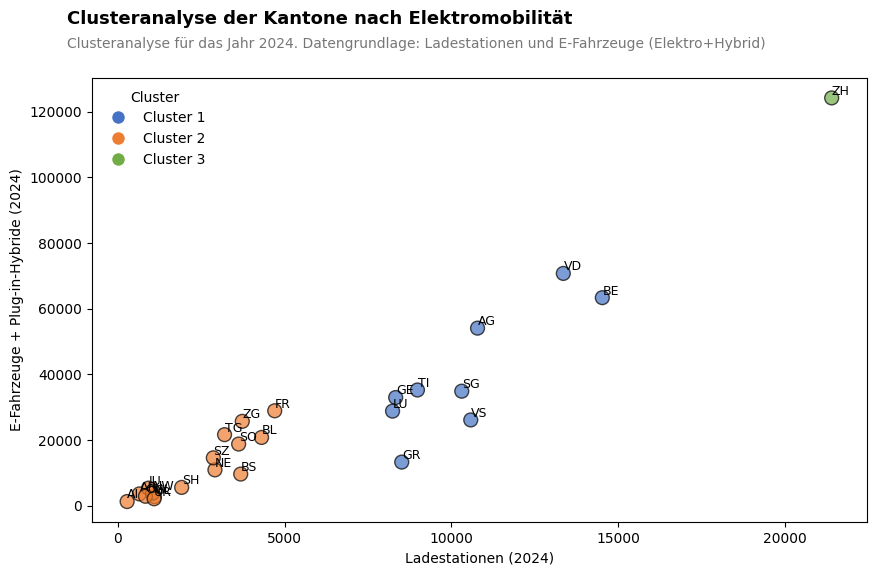

In [19]:
# Fahrzeuge (E + Plug-in-Hybrid) 2024 aufbereiten
jahre = [str(j) for j in range(2013, 2025)]
df_long = df_car_city.melt(
    id_vars=['Kantonskürzel', 'Treibstoff'],
    value_vars=jahre,
    var_name='Jahr',
    value_name='Fahrzeuganzahl'
)
df_long['Jahr'] = df_long['Jahr'].astype(int)

df_ephev = df_long[
    (df_long['Jahr'] == 2024) &
    (df_long['Treibstoff'].str.contains("Elektrisch|Plug-in-Hybrid", case=False, na=False))
]

fahrzeuge_2024 = df_ephev.groupby('Kantonskürzel')['Fahrzeuganzahl'].sum().reset_index()
fahrzeuge_2024.columns = ['Kanton', 'Fahrzeuge']

# Ladestationen 2024 vorbereiten
stations_list = []
station_cols = [col for col in df_lade.columns if col.startswith('stations_') and col.endswith('_count')]
if len(station_cols) == 0:
    station_cols = [col for col in df_lade.columns if 'stations' in col.lower() and 'count' in col.lower()]

target_year = 2024
if 'Jahr' in df_lade.columns and target_year not in df_lade['Jahr'].unique():
    target_year = df_lade['Jahr'].max()

for col in station_cols:
    try:
        kanton = col.split('_')[1]
        if 'Jahr' in df_lade.columns:
            temp = df_lade[df_lade['Jahr'] == target_year].copy()
        else:
            temp = df_lade.copy()
        if len(temp) > 0:
            if 'Jahr' in temp.columns:
                temp = temp.groupby('Jahr')[col].sum().reset_index()
            else:
                temp = pd.DataFrame({col: [temp[col].sum()]})
            temp['Kanton'] = kanton
            temp = temp.rename(columns={col: 'Ladestationen'})
            stations_list.append(temp)
    except Exception:
        continue

try:
    df_ladestationen_2024 = pd.concat(stations_list, ignore_index=True)
except ValueError:
    df_ladestationen_2024 = pd.DataFrame(columns=['Kanton', 'Ladestationen'])

# Merge nur Fahrzeuge + Ladestationen
df_cluster_2024 = pd.merge(fahrzeuge_2024, df_ladestationen_2024[['Kanton', 'Ladestationen']], on='Kanton', how='inner')

# KMeans-Clustering mit k = 3
if len(df_cluster_2024) >= 3:
    scaler = StandardScaler()
    X = df_cluster_2024[['Fahrzeuge', 'Ladestationen']]
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_cluster_2024['Cluster'] = kmeans.fit_predict(X_scaled)
else:
    df_cluster_2024['Cluster'] = 0

# Plot darstellen und Layout an IBCS Standard angepasst
plt.figure(figsize=(10, 6))
IBCS_BLACK = '#000000'
IBCS_GRAY = '#777777'
IBCS_CLUSTER_COLORS = ['#4572c4', '#ed7d31', '#70ad47']

n_used_clusters = df_cluster_2024['Cluster'].nunique()
cluster_colors = IBCS_CLUSTER_COLORS[:n_used_clusters]

plt.scatter(
    df_cluster_2024['Ladestationen'],
    df_cluster_2024['Fahrzeuge'],
    c=df_cluster_2024['Cluster'],
    cmap=plt.matplotlib.colors.ListedColormap(cluster_colors),
    s=100,
    alpha=0.7,
    edgecolor=IBCS_BLACK
)

for _, row in df_cluster_2024.iterrows():
    plt.text(row['Ladestationen'] + 5, row['Fahrzeuge'] + 100, row['Kanton'],
             fontsize=9, color=IBCS_BLACK, ha='left', va='bottom')

plt.xlabel(f'Ladestationen ({target_year})', fontsize=10, color=IBCS_BLACK)
plt.ylabel(f'E-Fahrzeuge + Plug-in-Hybride ({target_year})', fontsize=10, color=IBCS_BLACK)
plt.grid(False)
plt.tick_params(colors=IBCS_BLACK)
plt.xticks(color=IBCS_BLACK)
plt.yticks(color=IBCS_BLACK)

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=cluster_colors[i],
               markersize=10, label=f'Cluster {i+1}')
    for i in range(n_used_clusters)
]
plt.legend(handles=legend_elements, loc='upper left', frameon=False, title="Cluster")
plt.subplots_adjust(top=0.85)

fig = plt.gcf()
fig.text(0.1, 0.94, 'Clusteranalyse der Kantone nach Elektromobilität',
         fontsize=13, weight='bold', color=IBCS_BLACK, ha='left')
fig.text(0.1, 0.90, f'Clusteranalyse für das Jahr 2024. Datengrundlage: Ladestationen und E-Fahrzeuge (Elektro+Hybrid)',
         fontsize=10, color=IBCS_GRAY, ha='left')

plt.show()


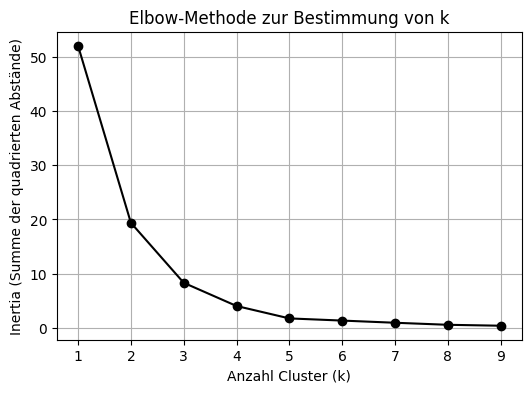

In [20]:
# Daten vorbereiten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow-Methode berechnen
inertias = []
k_range = range(1, min(10, len(df_cluster_2024)))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Elbow-Plot anzeigen
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o', color='black')
plt.xlabel('Anzahl Cluster (k)')
plt.ylabel('Inertia (Summe der quadrierten Abstände)')
plt.title('Elbow-Methode zur Bestimmung von k')
plt.grid(True)
plt.show()


## 3.7 Zusammenhang zwischen Strompreisen und Elektrofahrzeugen

Analyse ob es einen Zusammenhang zwischen den Strompreisen und der Anzahl Elektrofahrzeugen gibt.



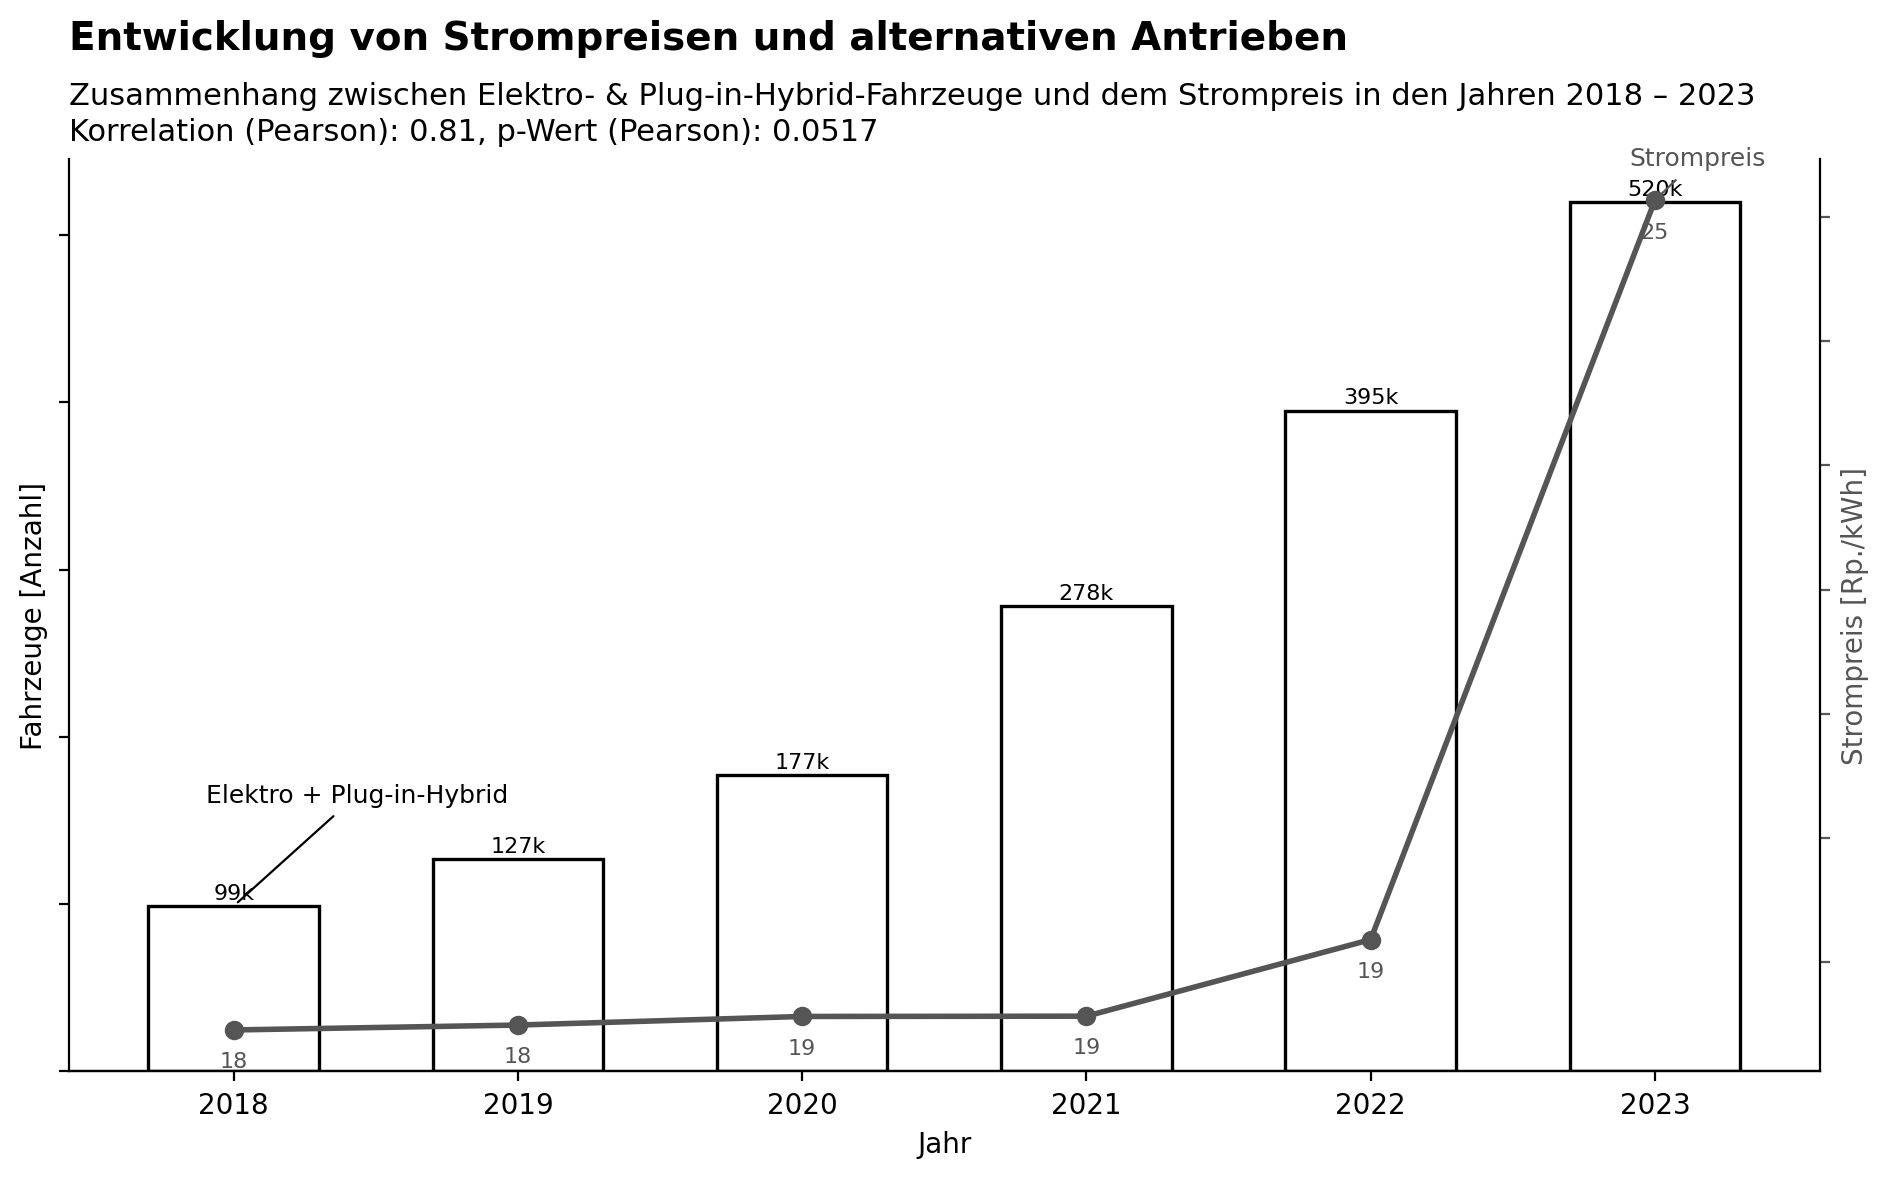

In [21]:
# Plugin für Notebook-Darstellung in hoher Auflösung
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

#Hilfsfunktion für dreistellige Beschriftung
def fmt3(value):
    if value < 1000:
        return f"{int(round(value))}"
    elif value < 9950:
        return f"{value / 1000:.1f}k"
    else:
        return f"{round(value / 1000):.0f}k"

# IBCS Farbschema
ibcs_colors = {
    "primary": "#000000",   # Schwarz
    "highlight": "#555555", # Dunkelgrau
    "accent": "#000000"     # Schwarz
}


# Jahr aus Periode-Spalte extrahieren
df_strom["Jahr"] = df_strom["Periode"].astype(str).astype(int)

# Relevante Treibstoffe (rein elektrisch + Plug-in-Hybrid)
relevante_kategorien = ["Elektro + Hybrid"]

# Elektro- & Plug-in-Hybrid-Fahrzeuge aggregieren
jahreszahlen = list(map(str, range(2018, 2024)))
df_elektro_hybrid = df_car_city[df_car_city["Treibstoff_Kategorie"].isin(relevante_kategorien)]
df_elektro_hybrid_grouped = df_elektro_hybrid[jahreszahlen].sum().reset_index()
df_elektro_hybrid_grouped.columns = ["Jahr", "Fahrzeuge"]
df_elektro_hybrid_grouped["Jahr"] = df_elektro_hybrid_grouped["Jahr"].astype(int)


# Strompreise je Jahr mitteln
df_strom_grouped = df_strom.groupby("Jahr")["Total exkl. MWST (Rp./kWH)"].mean().reset_index()
df_strom_grouped.columns = ["Jahr", "Strompreis"]

# Gemeinsamer DataFrame für die Visualisierung
df_plot = pd.merge(df_elektro_hybrid_grouped, df_strom_grouped, on="Jahr")

# Pearson-Korrelation berechnen
correlation, p_value = stats.pearsonr(df_plot["Fahrzeuge"], df_plot["Strompreis"])

# Layout an IBCS Standard angepasst
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

# Titel und Message
ax.text(0, 1.12, "Entwicklung von Strompreisen und alternativen Antrieben",
        transform=ax.transAxes, fontsize=14, fontweight="bold", ha="left", color=ibcs_colors["primary"])
ax.text(0, 1.06, "Zusammenhang zwischen Elektro- & Plug-in-Hybrid-Fahrzeuge und dem Strompreis in den Jahren 2018 – 2023",
        transform=ax.transAxes, fontsize=11, color=ibcs_colors["accent"], ha="left")
ax.text(0, 1.02, f"Korrelation (Pearson): {correlation:.2f}, p-Wert (Pearson): {p_value:.4f}",
        transform=ax.transAxes, fontsize=11, color=ibcs_colors["accent"], ha="left")



# Bar Fahrzeuge
bar_width = 0.6
bars = ax.bar(df_plot["Jahr"], df_plot["Fahrzeuge"],
              width=bar_width, color="white", edgecolor=ibcs_colors["primary"], linewidth=1.2)
# Labels in den Balken
for bar in bars:
    height = bar.get_height()
    ax.annotate(fmt3(height), xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 1), textcoords="offset points",
                ha="center", va="bottom", fontsize=8, color=ibcs_colors["primary"])

# Achsenbeschriftung
ax.set_ylabel("Fahrzeuge [Anzahl]", fontsize=10, color=ibcs_colors["primary"])
ax.tick_params(axis="y", colors=ibcs_colors["primary"], labelleft=False)
ax.set_xlabel("Jahr", fontsize=10, color=ibcs_colors["accent"])
ax.set_xticks(df_plot["Jahr"])
ax.set_xticklabels(df_plot["Jahr"], rotation=0)

# Enwicklung Strompreise
#Achsenbeschriftung
ax2 = ax.twinx()
ax2.plot(df_plot["Jahr"], df_plot["Strompreis"], marker="o", linewidth=2,
         color=ibcs_colors["highlight"])
ax2.set_ylabel("Strompreis [Rp./kWh]", fontsize=10, color=ibcs_colors["highlight"])
ax2.tick_params(axis="y", colors=ibcs_colors["highlight"], labelright=False)

# Labels der Punkte
for x, y in zip(df_plot["Jahr"], df_plot["Strompreis"]):
    ax2.annotate(fmt3(y), xy=(x, y), xytext=(0, -15), textcoords="offset points",
                 ha="center", va="bottom", fontsize=8, color=ibcs_colors["highlight"])

# Layout an IBCS Standard angepasst
ax.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)

# Gitterlinien entfernen
ax.grid(False)
ax2.grid(False)

# Strompreis-Beschriftung
ax2.annotate("Strompreis",
             xy=(df_plot["Jahr"].iloc[-1], df_plot["Strompreis"].iloc[-1]),
             xytext=(40, 15),
             textcoords="offset points",
             ha="right", va="center",
             fontsize=9, color=ibcs_colors["highlight"],
             arrowprops=dict(arrowstyle="-", color=ibcs_colors["highlight"], lw=0.8))

# Fahrzeuge-Beschriftung
ax.annotate("Elektro + Plug-in-Hybrid",
            xy=(df_plot["Jahr"].iloc[-6], df_plot["Fahrzeuge"].iloc[-6]),
            xytext=(-10, 40),
            textcoords="offset points",
            ha="left", va="center",
            fontsize=9, color=ibcs_colors["primary"],
            arrowprops=dict(arrowstyle="-", color=ibcs_colors["primary"], lw=0.8))

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()

# 4. Schritt: Präsentation der Informationen (Present Information)


## 4.1 Entwicklung der Personenfahrzeuge in der Schweiz
Wie hat sich der Bestand an Personenfahrzeugen in der Schweiz in den Jahren zwischen 2013-2023 Jahren entwickelt?

In der Schweiz ist der Bestand der Fahrzeuge zwischen den Jahren 2013 und 2023 um 404'061 Personenfahrzeuge gestiegen. Die prozentuale Zunahme entspricht somit 10.2 %, dies entspricht einer durchschnittlichen jährliche Wachstumsrate von 1.0 %.




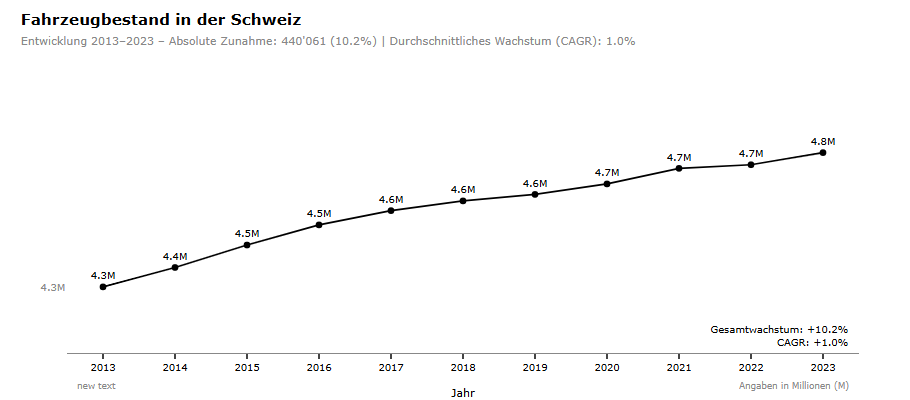

## 4.2 Vergleich von den einzelnen Kantonen zum nationalen Wachstum
Während die Schweiz insgesamt ein kontinuierliches Wachstum der Personenwagen verzeichnete, unterscheiden sich die Entwicklungen auf kantonaler Ebene teils deutlich. Städtische Kantone wie Basel-Stadt oder Genf zeigten ein unterdurchschnittliches Wachstum, was sich möglicherweise durch eine höhere ÖV-Nutzung und eingeschränkten Parkraum erklären lässt.  Den stärksten Rückgang erlebte Basel Stadt im Jahr 2015, wobei der Fahrzeugbestand um 1.9 % sank. Dagegen verzeichneten der Kanton Zug den stärksten Wachstum im Jahr 2018 von 5.1 %.


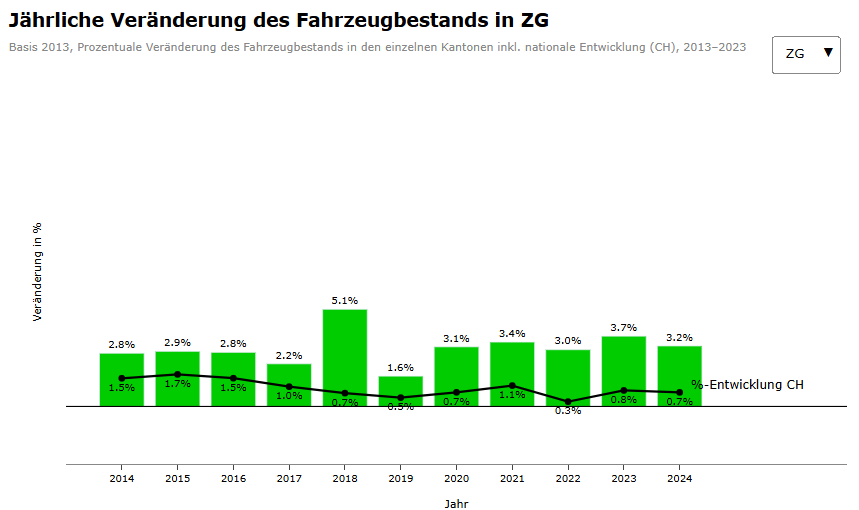

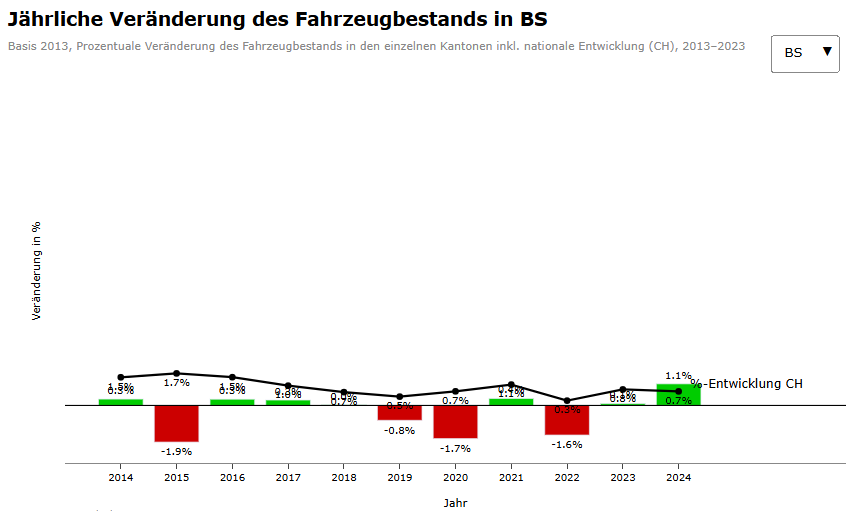


## 4.3 Vergleich der drei Haupttreibstofftypen

In diesem Diagramm wird der Fahrzeugbestand nach Treibstoffarten dargestellt. Dabei wurden neben den klassischen Treibstoffen wie Benzin und Diesel auch Fahrzeuge mit Elektromotor berücksichtigt, da diese zunehmend verbreitet sind. Andere Antriebsarten, wie zum Beispiel Wasserstoff und Gas, zeigen seit Jahren vergleichbare Werte und wurden daher in dieser Analyse nicht berücksichtigt.

Die  Veränderung der Fahrzeugbestände in der Schweiz zwischen den Jahren 2013 und 2024 weist auf signifikante Trends in Bezug auf die in den drei verbreitetesten Antriebsarten Diesel, Benzin und Elekto/Hybrid hin.

Benzin: Obwohl diese Antriebsart weiterhin den grössten Anteil ausmacht, sinkt der relative Anteil seit mehreren Jahren kontinuierlich. Der Bestand an Benzinfahrzeugen weist einen Rückgang von 10.4 % auf. Auch in der Prognose wird ein weitere Rückgang erwartet.

Diesel: Dieselfahrzeuge sind nach den Benzinfahrzeugen die zweit beliebteste Antriebsart. 2018 ist die Anzahl Dieselfahrzeuge stagniert und verzeichnete in den letzten drei Jahren einen Rückgang des Fahrzeugbetandes. Für die kommenden Jahren wird ein weiterer Rückgang erwartet.

Elektro/Hybrid: Die stärkste Entwicklung betrifft diese Kategorie. Besonders ab 2020 steigen die Zahlen sprunghaft an. Insgesamt weist der Bestand von Elektro- und Hybridfahrzeugen einen signfikaten Anstieg von über 1667.1 % auf. Für das Jahr 2026 wird prognostiziert, dass erstmals mehr Fahrzeuge mit alternativen Antrieb als Dieselfahrzeuge auf Schweizer Strassen unterwegs sein werden.

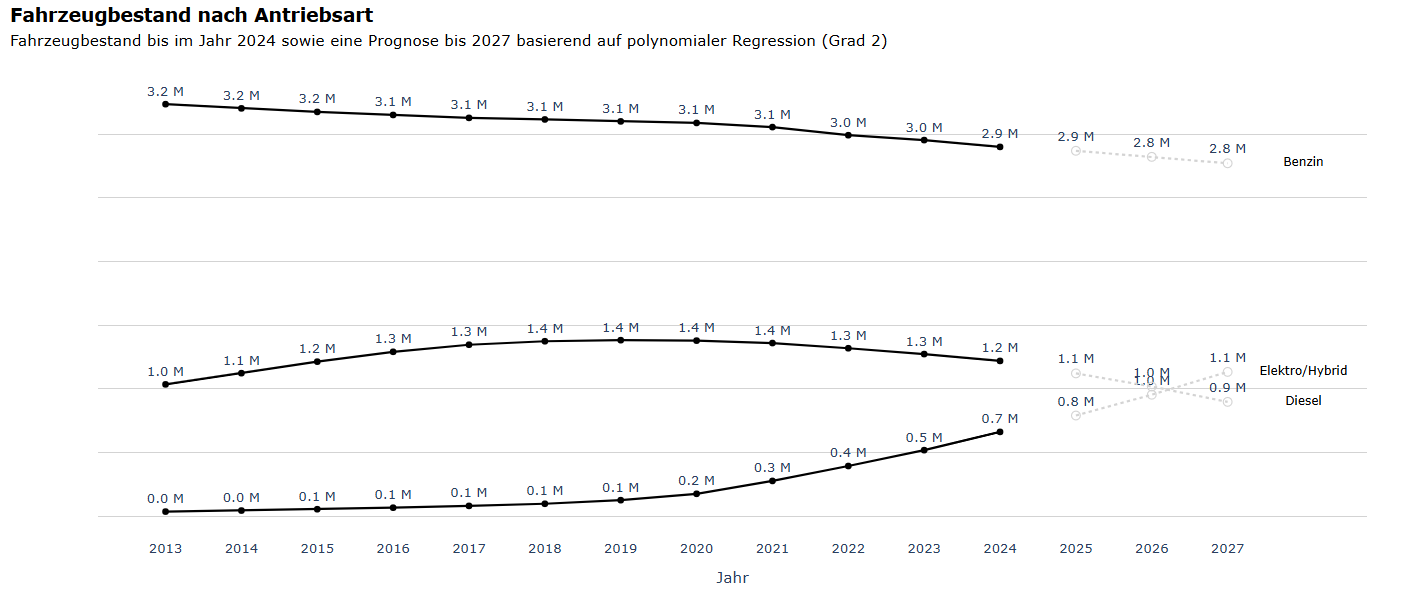


## 4.4 Entwicklung nach Treibstoffart und Kanton
In der untenstehenden Analyse sind die Kantone mit den prozentualen stärksten Veränderungen je nach Antriebstyp ersichtlich. Der stärkste Zuwachs ist bei den Elektrofahrzeuge zu sehen. Allen voran verzeichnete der Kanton Zug (ZG) mit +78.9 % die stärkste Zunahme, gefolgt von Uri (UR), Wallis (VS), Graubünden (GR) und Neuenburg (NE). Es ist aber anzumerken, dass in allen Kantonen der Anstieg von Elektro- und Hybridfahrzeugen im Jahr 2021 am stärksten ist. Alle diese fünf Kantone weisen einen Anstieg von über +65 % auf. Den stärksten Rückgang erlebten die Dieselfahrzeuge. Die stärksten Rückgänge wurden im Tessin (TI) mit –7.2 %, gefolgt von Zug (ZG), Waadt (VD), Genf (GE) und Zürich (ZH).

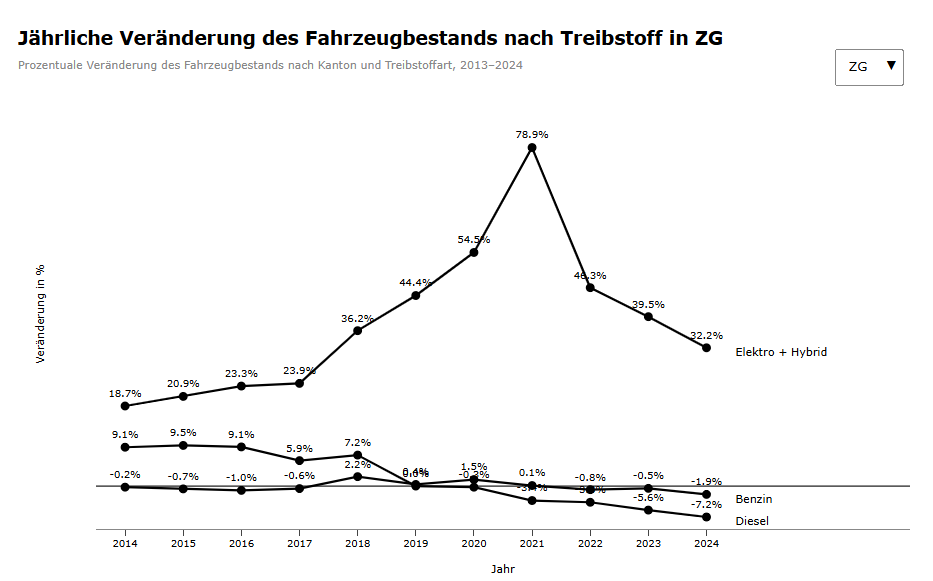

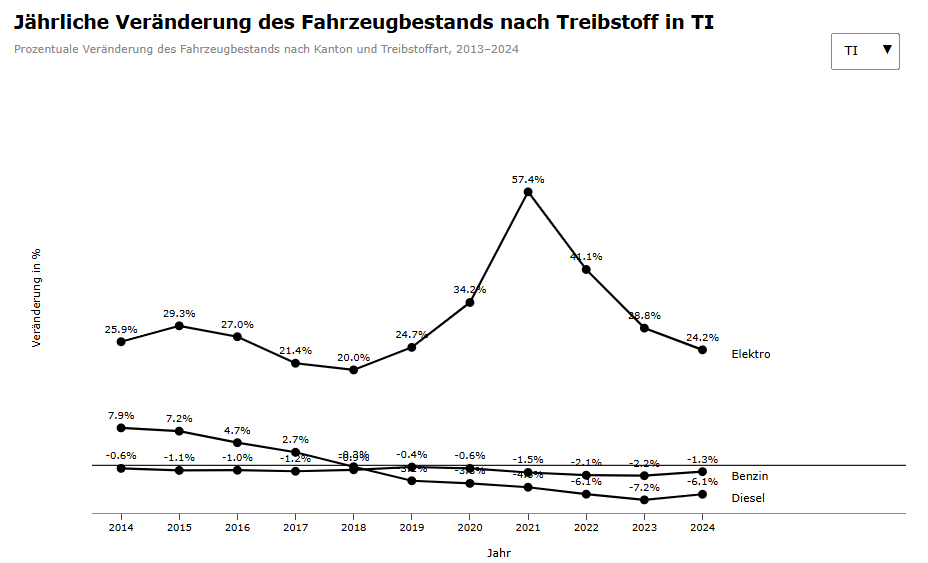

## 4.5 Zusammenhang zwischen dem Wachstum von Elektrofahrzeugen (Elektro + Plug-in-Hybrid-Fahrzeuge) und öffentlichen Ladestationen
Die Grafik zeigt deutlich, wie sich der Ausbau der öffentlichen Ladeinfrastruktur auf den Bestand an Elektro- und Plug-in-Hybridfahrzeugen in der Schweiz auswirkt. Auf der x-Achse ist die Anzahl öffentlicher Ladestationen dargestellt, auf der y-Achse der Fahrzeugbestand (Elektro + Plug-in-Hybride). Die schwarzen Punkte und die Linie zeigen die Entwicklung bis zum Jahr 2024. Mithilfe einer linearen Regression wurde der Zusammenhang zwischen beiden Grössen berechnet.
Die gestrichelte graue Linie stellt eine Prognose für die Jahre 2025 bis 2027 dar. Diese basiert auf der Annahme, dass sich die bisher beobachtete Entwicklung fortsetzt: Wenn die Ladeinfrastruktur weiter wächst, steigt auch die Zahl der E-Fahrzeuge in vergleichbarem Mass.
Auch bei der Person Korrelation mit dem Wert von 0.9707 zeigt sich eine starke positive Korrelation zwischen der Anzahl Ladestationen und dem Fahrzeugbestand.

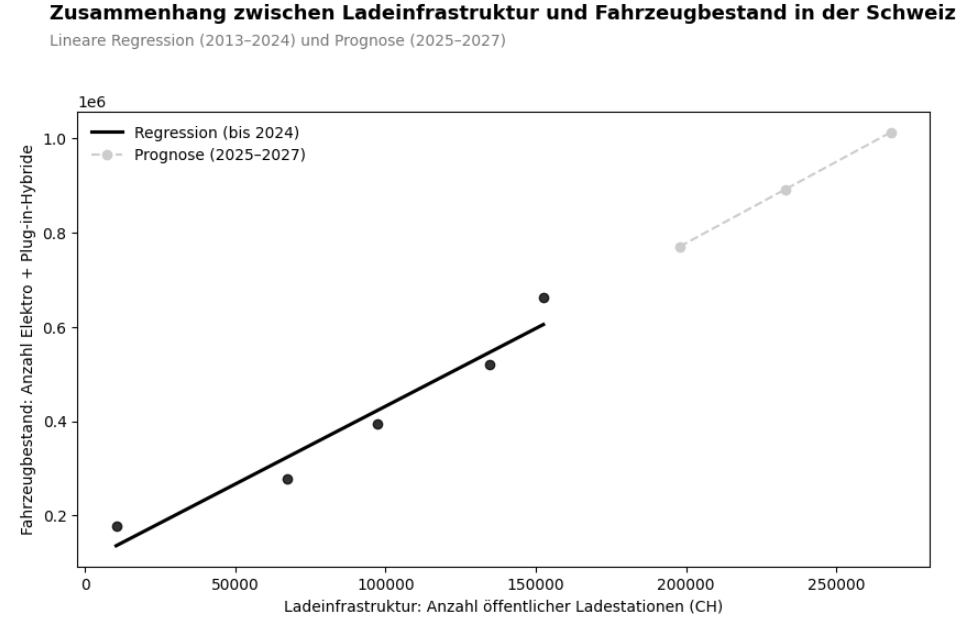

## 4.6 Regionale Differenzierung der Elektromobilität in der Schweiz
Die nachfolgende Grafik veranschaulicht die Resultate einer Clusteranalyse der Schweizer Kantone im Kontext der Elektromobilität, basierend auf den Dimensionen Fahrzeugbestand (Elektro- und Plug-in-Hybride) sowie der öffentlichen Ladeinfrastruktur (öffentliche Ladestationen). Insgesamt konnten vier unterschiedliche Cluster identifiziert werden:

Cluster 1 (blau): Beinhaltet neun Kantone mit mittleren bis hohen Werten, ohne jedoch die Ausprägungen des Clusters 3 zu erreichen.

Cluster 2 (orange): In diesem Cluster befinden sich die meisten Kantone. Die Kantone weisen vergleichsweise niedrigen Werten in beiden betrachteten Dimensionen auf.

Cluster 3 (grün): Ausschliesslich der Kanton Zürich fällt in diesen Cluster und zeichnet sich durch eine deutlich überdurchschnittliche Anzahl an sowohl Ladestationen als auch registrierten Fahrzeugen (Elektro + Hybrid) aus.

Es ist wichtig zu bedenken, dass die absolute Anzahl an Fahrzeugen und Ladestationen massgeblich durch strukturelle Faktoren wie Kantonsgrösse, Urbanisierungsgrad sowie die Bevölkerungsdichte beeinflusst wird.

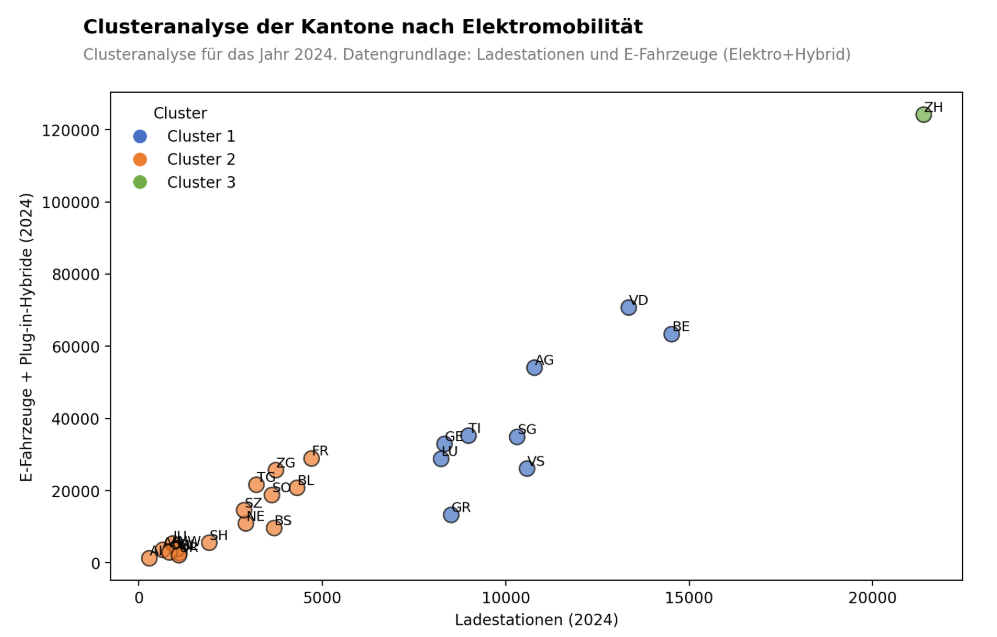

## 4.7 Zusammenhang zwischen Strompreisen und Elektrofahrzeugen

Zwischen 2018 und 2023 ist die Anzahl an Elektro- und Plug-in-Hybridfahrzeugen in der Schweiz stark angestiegen von 99'000 auf über 520'000 Fahrzeuge. Parallel dazu zeigt sich ein Anstieg des durchschnittlichen Strompreises, der über denselben Zeitraum von konstanten 18 bis 19 Rp./kWh bis 2021 auf 25 Rp./kWh im Jahr 2023 gestiegen ist. Dies ergibt eine Pearson-Korrelation von 0.81 wobei der p-Wert von 0.0517 beträgt.

Die Analyse zeigt somit eine  positive Korrelation zwischen Strompreisen und der Anzahl an Elektro- und Plug-in-Hybridfahrzeugen. Zwar liegt der p-Wert knapp über dem üblichen Signifikanzniveau, dennoch deutet das Ergebnis auf einen potenziellen Zusammenhang hin. Aufgrund der geringen Anzahl an Beobachtungsjahren ist das Resultat mit Vorsicht zu interpretieren. Ebenfalls ist zu beachten, dass es der Strompreis durch viele weitere Faktoren beeinflusst wird.

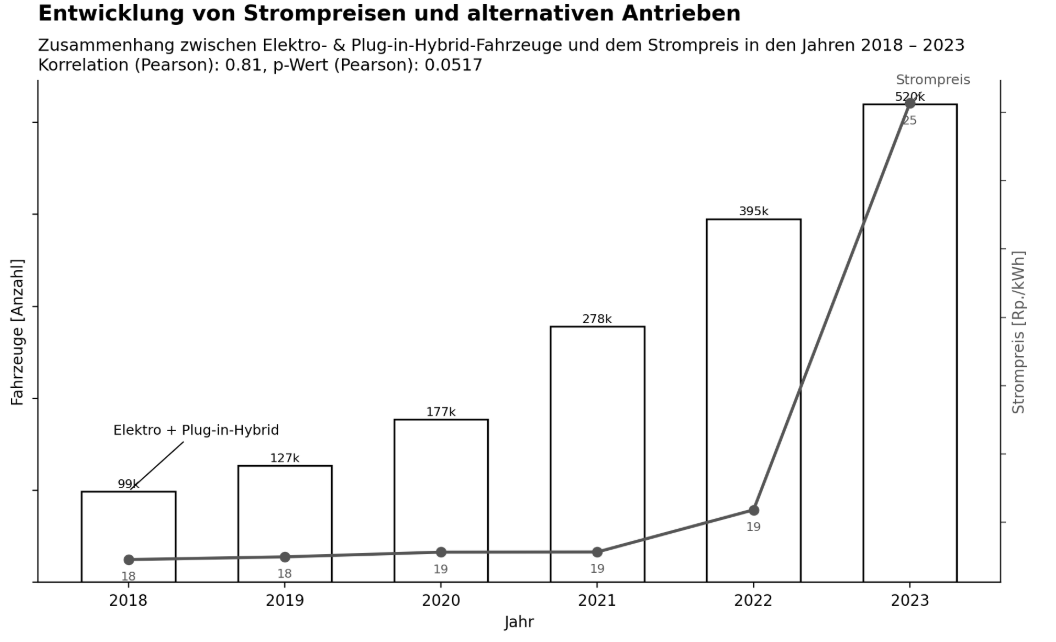

# 5. Schritt: Datengestützte Entscheidungen und Empfehlungen (Make Data-Driven Decisions)

Auf Grundlage der analysierren Daten sind kantonale Unterschiede und statistische Zusammenhänge ersichtlich. Die Daten zeigen, dass die Personenfahrzeuge in der Schweiz seit dem Jahr 2013 stetig gestiegen sind. Besonders hervorzuheben ist die Anzahl an Elektro- und Plug-in-Hybridfahrzeugen in der Schweiz, welche über 1667.1 % im Vergleich zum Jahr 2013 gestiegen sind.

Im Vergleich der Kantone mit der Ladeinfrastuktur sticht vorallem der Kanton Zürich hervor. Kantone, welchen noch eine geringe Anzahl an Ladestationen verfügen, könnten somit durch Subventionen einen weiteren Ausbau fördern.

Ebenfalls liefern die Ergebnisse erste Hinweise auf einen Zusammenhang zwischen Strompreisen und der Verbreitung von E-Fahrzeugen in der Schweiz. Für belastbare Aussagen sind jedoch mehr Datenpunkte und eine multivariate Analyse erforderlich, um externe Einflüsse herauszurechnen. Denn der Strompreis hängt von zahlreichen weiteren Faktoren ab (z. B. Netzkosten, Energiequellen, internationale Märkte), sodass ein direkter Kausalzusammenhang mit der E-Mobilität nicht gesichert ist.

Hinweis: Diese Implikationen sind basierend auf einer dieser ersten Analyse im Rahmen dieser Arbeit. Für entgültige Entscheidungen benötigt es weitere Untersuchungen und Expertenwissen.

# 6. Verwendete Hilfsmittel
Für die Erstellung dieser Arbeit wurden zum einen die Unterlagen vom BINA Unterricht verwendet aber auch folgende Hilfsmittel:



*   Google Colab zur Entwicklung, Ausführung und Validierung des Codes
*   Claude.AI als KI-gestützter Programmierassistent zur Code-Vervollständigung und Verbesserung
*   ChatGPT zur sprachlichen Überprüfung (Rechtschreibung, Stil, Einheitlichkeit) sowie zur Verbesserung von Code-Abschnitten
